In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx


In [2]:
# importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# load the file

tr = pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx')
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
print(tr.Airline.unique())
print(' = = = = = = = = = = = = = = = = = = = = = = = =')
print(tr.Source.unique())
print(' = = = = = = = = = = = = = = = = = = = = = = = =')
print(tr.Destination.unique())
print(' = = = = = = = = = = = = = = = = = = = = = = = =')
print(tr.Additional_Info.unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
 = = = = = = = = = = = = = = = = = = = = = = = =
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
 = = = = = = = = = = = = = = = = = = = = = = = =
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
 = = = = = = = = = = = = = = = = = = = = = = = =
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [6]:
#Let us find the missing values
# and drop them if present
tr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
tr.dropna(inplace = True)

In [8]:
tr.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


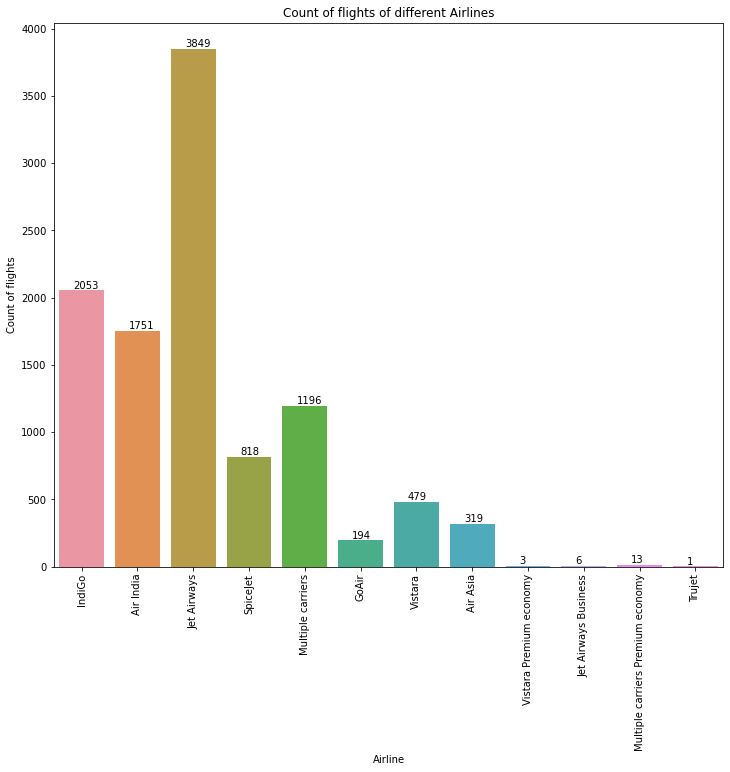

In [10]:
plt.figure(figsize = (12, 10))
plt.title('Count of flights of different Airlines')
ax=sns.countplot(x = 'Airline', data =tr)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

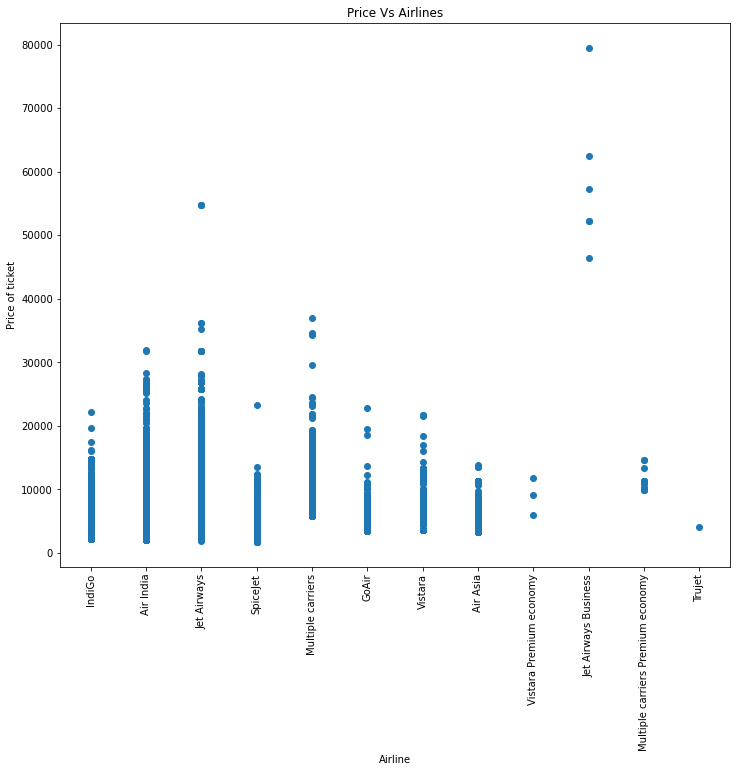

In [11]:
plt.figure(figsize = (12, 10))
plt.title('Price Vs Airlines')
plt.scatter(tr['Airline'], tr['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [12]:
tr['SrcDst']=tr['Source'].astype(str)+'-'+tr['Destination']

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

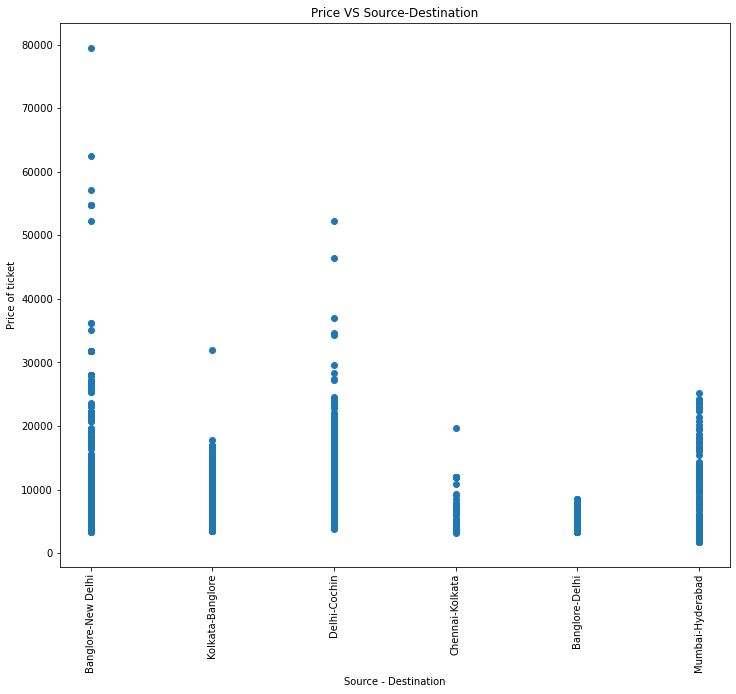

In [13]:
plt.figure(figsize = (12, 10))
plt.title('Price VS Source-Destination')
plt.scatter(tr['SrcDst'], tr['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Source - Destination')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [14]:
del tr['SrcDst']

We will extract date and month from the 'Date_of_Journey' column and make separate columns, also we will extract hour and minutes from 'Dep_Time' and make separate columns.

For that, we need to convert both the columns from object type to datetime type first.

In [15]:
# converting the Date_of_Journey to datetime

tr["Date_of_Journey"] = pd.to_datetime(tr.Date_of_Journey, format="%d/%m/%Y")

In [16]:
# Extracting day and month from the column

tr["Journey_Day"] = pd.to_datetime(tr.Date_of_Journey, format="%d/%m/%Y").dt.day

tr["Journey_Month"] = pd.to_datetime(tr.Date_of_Journey, format="%d/%m/%Y").dt.month

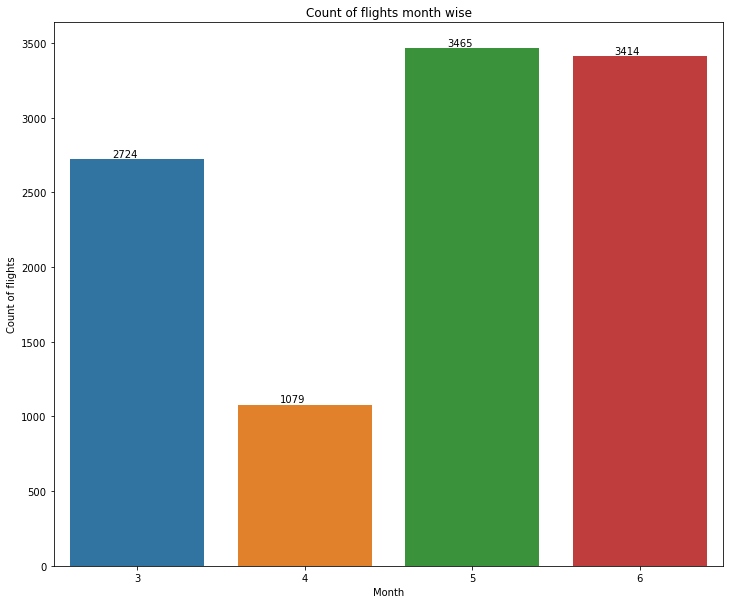

In [17]:
plt.figure(figsize = (12, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_Month', data = tr)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [18]:
# putting days of week for the respective dates, since flight price might change according to the weekdays/weekends

tr['Journey_Day_DOW'] = tr['Date_of_Journey'].dt.day_name()

In [19]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tr['Journey_Day_DOW'] = pd.Categorical(tr['Journey_Day_DOW'], categories=cats, ordered=True)
tr = tr.sort_values('Journey_Day_DOW')

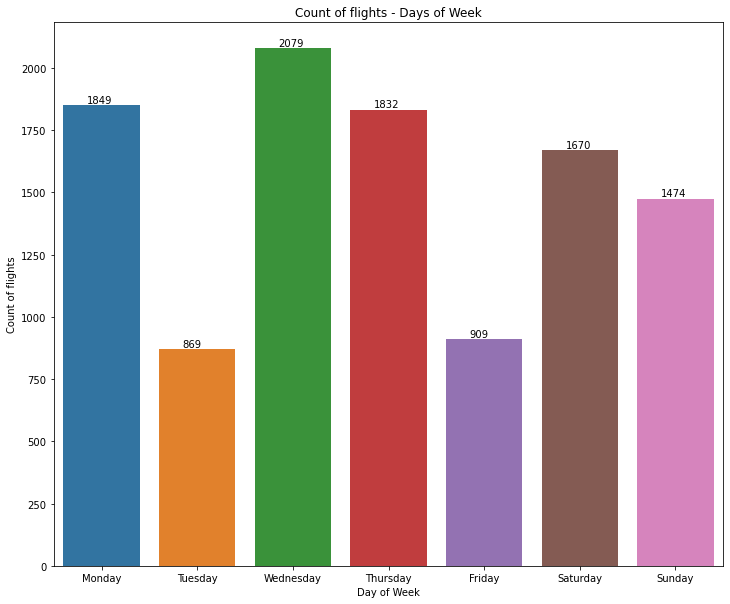

In [20]:
plt.figure(figsize = (12, 10))
plt.title('Count of flights - Days of Week')
ax=sns.countplot(x = 'Journey_Day_DOW', data = tr)
plt.xlabel('Day of Week')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [21]:
# replacing the Total Stops value to look more clean

tr['Total_Stops'] = tr['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'], [0,1,2,3,4])

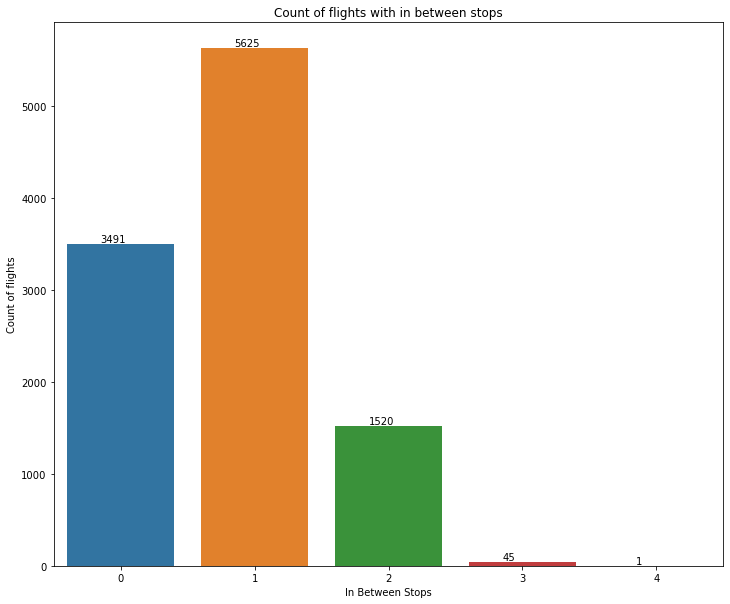

In [22]:
plt.figure(figsize = (12, 10))
plt.title('Count of flights with in between stops')
ax=sns.countplot(x = 'Total_Stops', data = tr)
plt.xlabel('In Between Stops')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

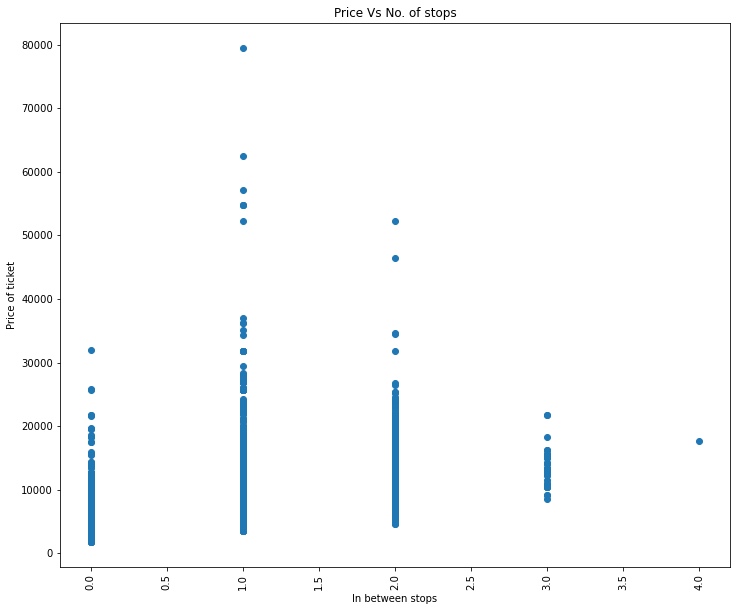

In [23]:
plt.figure(figsize = (12, 10))
plt.title('Price Vs No. of stops')
plt.scatter(tr['Total_Stops'], tr['Price'])
plt.xticks(rotation = 90)
plt.xlabel('In between stops')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [24]:
tr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_DOW
9686,IndiGo,2019-05-27,Kolkata,Banglore,CCU → BLR,22:15,00:50 28 May,2h 35m,0,No info,4804,27,5,Monday
9410,Vistara,2019-05-27,Banglore,Delhi,BLR → DEL,07:00,09:40,2h 40m,0,No info,4668,27,5,Monday
1404,IndiGo,2019-03-18,Mumbai,Hyderabad,BOM → HYD,19:05,20:30,1h 25m,0,No info,2754,18,3,Monday
1403,Jet Airways,2019-05-06,Banglore,Delhi,BLR → DEL,15:15,18:10,2h 55m,0,In-flight meal not included,3702,6,5,Monday
1402,IndiGo,2019-05-06,Kolkata,Banglore,CCU → BLR,11:30,14:05,2h 35m,0,No info,5224,6,5,Monday


In [25]:
#Converting the duration in minutes

#Finding all numbers in a string
import re
duration_series = tr["Duration"].str.findall(r'\d+')

In [26]:
duration_series

9686     [2, 35]
9410     [2, 40]
1404     [1, 25]
1403     [2, 55]
1402     [2, 35]
          ...   
1532     [2, 50]
9314    [21, 25]
1535     [2, 50]
1593    [22, 55]
0        [2, 50]
Name: Duration, Length: 10682, dtype: object

In [27]:
tr['Duration']=  tr['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [28]:
tr.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Day_DOW
1532,IndiGo,2019-03-03,Banglore,New Delhi,BLR → DEL,23:30,02:20 04 Mar,170,0,No info,6144,3,3,Sunday
9314,Jet Airways,2019-03-24,Kolkata,Banglore,CCU → BOM → BLR,18:55,16:20 25 Mar,1285,1,No info,14231,24,3,Sunday
1535,SpiceJet,2019-03-24,Banglore,New Delhi,BLR → DEL,20:30,23:20,170,0,No check-in baggage included,3873,24,3,Sunday
1593,Jet Airways,2019-06-09,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 Jun,1375,2,In-flight meal not included,10368,9,6,Sunday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,24,3,Sunday


In [29]:
tr.drop(tr.tail(2).index, inplace=True) # drop last n rows

In [30]:
# changing the dtype to int

tr[['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month']] = tr[['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month']].astype(int)

In [31]:
tr.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                    int64
Total_Stops                 int64
Additional_Info            object
Price                       int64
Journey_Day                 int64
Journey_Month               int64
Journey_Day_DOW          category
dtype: object

In [32]:
# dropping the columns that are not required

tr = tr.drop(['Additional_Info'], axis= 1)

tr = tr.drop(['Arrival_Time'], axis= 1) # dropping it because we have Duration and Departure Time

In [33]:
tr['Duration'] = tr['Duration'].astype('int')

In [34]:
tr.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Duration                    int64
Total_Stops                 int64
Price                       int64
Journey_Day                 int64
Journey_Month               int64
Journey_Day_DOW          category
dtype: object

In [35]:
#extracting hour and minute values from Dep_Time

deptime_df = tr["Dep_Time"].str.split(":")
deptime_df

9686    [22, 15]
9410    [07, 00]
1404    [19, 05]
1403    [15, 15]
1402    [11, 30]
          ...   
7205    [11, 05]
1531    [19, 50]
1532    [23, 30]
9314    [18, 55]
1535    [20, 30]
Name: Dep_Time, Length: 10680, dtype: object

In [36]:
for x in tr.index:
    tr.loc[x,'Dep_Time_Hour'] = deptime_df[x][0].strip()
    tr.loc[x, 'Dep_Time_Minute'] = deptime_df[x][1].strip()
    

In [37]:
print(tr.head())

          Airline Date_of_Journey    Source Destination      Route Dep_Time  \
9686       IndiGo      2019-05-27   Kolkata    Banglore  CCU → BLR    22:15   
9410      Vistara      2019-05-27  Banglore       Delhi  BLR → DEL    07:00   
1404       IndiGo      2019-03-18    Mumbai   Hyderabad  BOM → HYD    19:05   
1403  Jet Airways      2019-05-06  Banglore       Delhi  BLR → DEL    15:15   
1402       IndiGo      2019-05-06   Kolkata    Banglore  CCU → BLR    11:30   

      Duration  Total_Stops  Price  Journey_Day  Journey_Month  \
9686       155            0   4804           27              5   
9410       160            0   4668           27              5   
1404        85            0   2754           18              3   
1403       175            0   3702            6              5   
1402       155            0   5224            6              5   

     Journey_Day_DOW Dep_Time_Hour Dep_Time_Minute  
9686          Monday            22              15  
9410          Monday  

In [38]:
# dropping the datetime value since columns have been extracted from them

tr = tr.drop(['Dep_Time'], axis=1)
tr = tr.drop(['Date_of_Journey'], axis=1)

print(tr.head())

          Airline    Source Destination      Route  Duration  Total_Stops  \
9686       IndiGo   Kolkata    Banglore  CCU → BLR       155            0   
9410      Vistara  Banglore       Delhi  BLR → DEL       160            0   
1404       IndiGo    Mumbai   Hyderabad  BOM → HYD        85            0   
1403  Jet Airways  Banglore       Delhi  BLR → DEL       175            0   
1402       IndiGo   Kolkata    Banglore  CCU → BLR       155            0   

      Price  Journey_Day  Journey_Month Journey_Day_DOW Dep_Time_Hour  \
9686   4804           27              5          Monday            22   
9410   4668           27              5          Monday            07   
1404   2754           18              3          Monday            19   
1403   3702            6              5          Monday            15   
1402   5224            6              5          Monday            11   

     Dep_Time_Minute  
9686              15  
9410              00  
1404              05  
1403  

In [39]:
tr.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration              int64
Total_Stops           int64
Price                 int64
Journey_Day           int64
Journey_Month         int64
Journey_Day_DOW    category
Dep_Time_Hour        object
Dep_Time_Minute      object
dtype: object

In [40]:
# dealing with categorical values

tr = pd.get_dummies(tr, columns=['Airline','Source','Destination','Route','Journey_Day_DOW'],drop_first=True)

In [41]:
print(tr.head())

      Duration  Total_Stops  Price  Journey_Day  Journey_Month Dep_Time_Hour  \
9686       155            0   4804           27              5            22   
9410       160            0   4668           27              5            07   
1404        85            0   2754           18              3            19   
1403       175            0   3702            6              5            15   
1402       155            0   5224            6              5            11   

     Dep_Time_Minute  Airline_Air India  Airline_GoAir  Airline_IndiGo  ...  \
9686              15                  0              0               1  ...   
9410              00                  0              0               0  ...   
1404              05                  0              0               1  ...   
1403              15                  0              0               0  ...   
1402              30                  0              0               1  ...   

      Route_DEL → RPR → NAG → BOM → COK  Rou

In [42]:
# getting all the dtypes since number of columns are too high

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tr.dtypes)

Duration                                      int64
Total_Stops                                   int64
Price                                         int64
Journey_Day                                   int64
Journey_Month                                 int64
Dep_Time_Hour                                object
Dep_Time_Minute                              object
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_IndiGo                                uint8
Airline_Jet Airways                           uint8
Airline_Jet Airways Business                  uint8
Airline_Multiple carriers                     uint8
Airline_Multiple carriers Premium economy     uint8
Airline_SpiceJet                              uint8
Airline_Trujet                                uint8
Airline_Vistara                               uint8
Airline_Vistara Premium economy               uint8
Source_Chennai                                uint8
Source_Delhi

We can see tha hour and minute columns are of object dtype, but should be int dtype.

In [43]:
# setting hour and minute dtype as int

tr[['Dep_Time_Hour', 'Dep_Time_Minute']] = tr[['Dep_Time_Hour', 'Dep_Time_Minute']].astype(int)

In [44]:
tr.head()

,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Journey_Day_DOW_Tuesday,Journey_Day_DOW_Wednesday,Journey_Day_DOW_Thursday,Journey_Day_DOW_Friday,Journey_Day_DOW_Saturday,Journey_Day_DOW_Sunday
9686,155,0,4804,27,5,22,15,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9410,160,0,4668,27,5,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1404,85,0,2754,18,3,19,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1403,175,0,3702,6,5,15,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,155,0,5224,6,5,11,30,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor


from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [46]:
#splitting the dataset into train and test values

train, test= train_test_split(tr, test_size=0.25, random_state= 101)


In [47]:
x_train = train.drop(['Price'], axis=1)
y_train = train['Price']

x_test = test.drop(['Price'], axis=1)
y_test = test['Price']

In [48]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

In [49]:
x_test = sc.fit_transform(x_test)

In [50]:
#y_train = sc.fit_transform(y_train)

In [51]:
# Decision Tree Regressor

estimator = DecisionTreeRegressor()
param_distributions = { 
            "splitter"      : ['best','random'],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            }

dtmodel = RandomizedSearchCV(estimator, param_distributions, n_jobs=-1, cv=5)
dtmodel.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 8],
                                        'splitter': ['best', 'random']})

In [52]:
y_pred_tr = dtmodel.predict(x_train)
y_pred = dtmodel.predict(x_test)

print('Train Score: ',dtmodel.score(x_train, y_train))
print('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
print('Test Score: ',dtmodel.score(x_test, y_test))

Train Score:  0.9222763073609349
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Test Score:  0.6578488535454983


In [53]:
# Ada Boost Regressor

estimator = AdaBoostRegressor()
param_distributions = { 
            "n_estimators"      : [50,100,300,500],
            "loss"              : ["linear", "square", "exponential"],
            "learning_rate"     : [0.1,1,3],
            "random_state"      : [20,101,51]
            }
abmodel = RandomizedSearchCV(estimator, param_distributions, n_jobs=-1, cv=5)
abmodel.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 1, 3],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 300, 500],
                                        'random_state': [20, 101, 51]})

In [54]:
y_pred_tr = abmodel.predict(x_train)
y_pred = abmodel.predict(x_test)

print('Train Score: ',abmodel.score(x_train, y_train))
print('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
print('Test Score: ',abmodel.score(x_test, y_test))

Train Score:  0.5756443237464836
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Test Score:  0.5040804705094035


In [55]:
# K-NeighborsRegressors

estimator = KNeighborsRegressor()

param_distributions = { 
            "n_neighbors"       : [5,7,9],
            "weights"           : ["uniform", "distance"],
            "algorithm"         : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            "p"                 : [1,2]
            }
knmodel = RandomizedSearchCV(estimator, param_distributions, n_jobs=-1, cv=5)
knmodel.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [5, 7, 9], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [56]:
y_pred_tr = knmodel.predict(x_train)
y_pred = knmodel.predict(x_test)

print('Train Score: ',knmodel.score(x_train, y_train))
print('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
print('Test Score: ',knmodel.score(x_test, y_test))

Train Score:  0.853719746757936
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Test Score:  0.7138624448868335


In [57]:
# Random Forest Regressor

estimator = RandomForestRegressor()
param_distributions = { 
            "n_estimators"      : [100,300,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True,False],
            }

rfmodel = RandomizedSearchCV(estimator, param_distributions, n_jobs=-1, cv=5)
rfmodel.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [100, 300, 500]})

In [58]:
y_pred_tr = rfmodel.predict(x_train)
y_pred = rfmodel.predict(x_test)

print('Train Score: ',rfmodel.score(x_train, y_train))
print('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
print('Test Score: ',rfmodel.score(x_test, y_test))

Train Score:  0.9454863950330326
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Test Score:  0.8047836059459303


In [59]:
# XGBoost Regresor

import xgboost as xgb
xgmodel = xgb.XGBRegressor()

param_distributions = {
            'learning_rate'     : [0.01,0.05,0.1],
            "booster"           : ['gbtree','gblinear','dart'],
            'alpha'             : [5,10,15],
            'reg_lambda'        : [0.1, 1.0, 10.0],
            'max_depth'         : [4, 5, 6, 7],
            'n_estimators'      : [100, 200, 300, 400, 500]
            }
xgmodel = RandomizedSearchCV(XGBRegressor(), param_distributions,cv=5, n_jobs=-1)
xgmodel.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [60]:
y_pred_tr = xgmodel.predict(x_train)
y_pred = xgmodel.predict(x_test)

print('Train Score: ',xgmodel.score(x_train, y_train))
print('=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*')
print('Test Score: ',xgmodel.score(x_test, y_test))

Train Score:  0.9006784581764118
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Test Score:  0.8233182299810176
